In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay, classification_report
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import plotly.express as px
import string
import warnings
warnings.filterwarnings('ignore')

In [ ]:
file_path = '/content/drive/My Drive/dataset/WELFake_Dataset.csv'
from google.colab import drive
drive.mount('/content/drive')
# Option 1: Provide the full path when reading the CSV
data = pd.read_csv(file_path)
data.head()



Mounted at /content/drive


,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
data.tail()

,Unnamed: 0,title,text,label
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0
72133,72133,Goldman Sachs Endorses Hillary Clinton For Pre...,Goldman Sachs Endorses Hillary Clinton For Pre...,1


In [ ]:
data['text'][0] #label 1, Real News

'No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 minute clip from the radio show can be heard here. It was provided to Breitbart Texas by someone who would like to be referred to

In [ ]:
data['text'][72131] # Label 0, Spam News

'Migrants Refuse To Leave Train At Refugee Camp In Hungary\n\nThousands of migrants flooded into a train station in the Hungarian capital Thursday after police lifted a two-day blockade, but some who boarded a train they thought was going to Germany ended up instead at a refugee camp just miles from Budapest.\n\nThe Associated Press reports that "excited migrants piled into a newly arrived train at the Keleti station in Hungary\'s capital despite announcements in Hungarian and English that all services from the station to Western Europe had been canceled. A statement on the main departures board said no more trains to Austria or Germany would depart \'due to safety reasons until further notice!\'\n\n"Many migrants, who couldn\'t understand either language and were receiving no advice from Hungarian officials, scrambled aboard in a standing-room-only crush and hoped for the best," the AP said.\n\nScuffles broke out when police ordered the passengers off the train at Bicske, according to

In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
data.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [ ]:
data.fillna(' ', inplace=True)
features = data[['title', 'text']]
labels = data['label']

In [ ]:
data.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [ ]:
label_Status = data['label'].value_counts()
transactions = label_Status.index
quantity = label_Status.values

figure = px.pie(data,
             values=quantity,
             names=transactions, hole =.60,
             title="Spam & Ham Status")
figure.show()

In [ ]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)

fake_text = ' '.join(data[data['label'] == 0]['text'])
real_text = ' '.join(data[data['label'] == 1]['text'])

In [ ]:
text_column = 'text'
label_column = 'label'

In [ ]:
import nltk

# Download the stopwords resource
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_set = set(stopwords.words('english'))
# Now you can use stopwords_set in your code


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stopword = set(stopwords.words('english'))
stopword

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
stopwords.fileids()

['arabic',
 'azerbaijani',
 'basque',
 'bengali',
 'catalan',
 'chinese',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hebrew',
 'hinglish',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def preprocess_text(text):
    # Remove punctuation
    remove_punc = [char for char in text if char not in string.punctuation]
    clean_words = ''.join(remove_punc) # char joining

    #Remove stopwords
    text = ([word for word in clean_words.split() if word.lower() not in stopword]) # stopword = stopwords.words('english')
    return text

In [ ]:
data[text_column] = data[text_column].apply(preprocess_text)

In [ ]:
data[text_column]

0        [comment, expected, Barack, Obama, Members, FY...
1                          [post, votes, Hillary, already]
2        [demonstrators, gathered, last, night, exercis...
3        [dozen, politically, active, pastors, came, pr...
4        [RS28, Sarmat, missile, dubbed, Satan, 2, repl...
                               ...                        
72129    [WASHINGTON, Reuters, Hackers, believed, worki...
72130    [know, fantasyland, Republicans, never, questi...
72131    [Migrants, Refuse, Leave, Train, Refugee, Camp...
72132    [MEXICO, CITY, Reuters, Donald, Trump’s, comba...
72133    [Goldman, Sachs, Endorses, Hillary, Clinton, P...
Name: text, Length: 72134, dtype: object

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer

# Set the NLTK data path
nltk.data.path.append("C:/Users/User/nltk_data")

# Download the WordNet resource
nltk.download('wordnet')

# Create the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define your lemmatize_text function
def lemmatize_text(text):
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in text])
    return lemmatized_text

# Assuming 'text_column' is the column in your DataFrame containing text data
data[text_column] = data[text_column].apply(lemmatize_text)


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
data[text_column]

0        comment expected Barack Obama Members FYF911 F...
1                                post vote Hillary already
2        demonstrator gathered last night exercising co...
3        dozen politically active pastor came private d...
4        RS28 Sarmat missile dubbed Satan 2 replace SS1...
                               ...                        
72129    WASHINGTON Reuters Hackers believed working Ru...
72130    know fantasyland Republicans never questioned ...
72131    Migrants Refuse Leave Train Refugee Camp Hunga...
72132    MEXICO CITY Reuters Donald Trump’s combative s...
72133    Goldman Sachs Endorses Hillary Clinton Preside...
Name: text, Length: 72134, dtype: object

In [ ]:
vectorizer = TfidfVectorizer()

x = vectorizer.fit_transform(data[text_column])
y = data[label_column]

In [ ]:
y

0        1
1        1
2        1
3        0
4        1
        ..
72129    0
72130    1
72131    0
72132    0
72133    1
Name: label, Length: 72134, dtype: int64

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, labels, test_size=0.3, random_state=42)

In [ ]:
def evaluate_model(model, xtest, ytest):
    y_pred = model.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    cm = confusion_matrix(ytest, y_pred)
    prob = model.predict_proba(xtest)[:, 1]
    roc_auc = roc_auc_score(ytest, prob)
    fpr, tpr, thresholds = roc_curve(ytest, prob)
    precision, recall, _ = precision_recall_curve(ytest, prob)
    pr_auc = auc(recall, precision)

    return {
        'Accuracy': accuracy,
        'Confusion Matrix': cm,
    }

In [ ]:
mnb_model = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
mnb_model.fit(xtrain, ytrain)

MultinomialNB()

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

In [ ]:
nb_results = evaluate_model(mnb_model, xtest, ytest)
nb_results

{'Accuracy': 0.8765306593965159,
 'Confusion Matrix': array([[9711,  902],
        [1770, 9258]])}

In [ ]:
cm = confusion_matrix(ytest, mnb_model.predict(xtest))
cm

array([[9711,  902],
       [1770, 9258]])

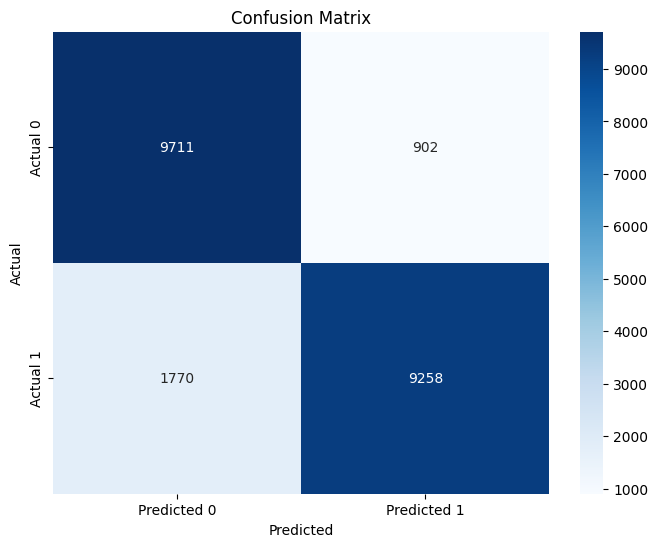

In [ ]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(ytest, mnb_model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     10613
           1       0.91      0.84      0.87     11028

    accuracy                           0.88     21641
   macro avg       0.88      0.88      0.88     21641
weighted avg       0.88      0.88      0.88     21641



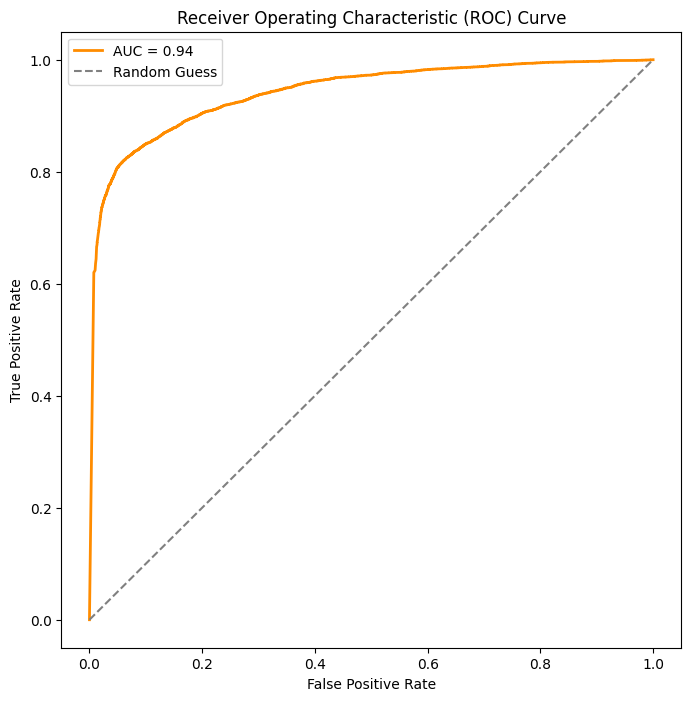

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt

# Assuming 'bnb_model' is your trained Bernoulli Naive Bayes model
# 'xtest' is the feature data, and 'ytest' is the corresponding labels

# Ensure 'bnb_model' is fitted before using it
bnb_model = BernoulliNB()
bnb_model.fit(xtrain, ytrain)

# Get predicted probabilities for the positive class
y_probs = bnb_model.predict_proba(xtest)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(ytest, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [ ]:
bnb_model = BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)
bnb_model.fit(xtrain, ytrain)

BernoulliNB()

In [ ]:
bnb_results = evaluate_model(bnb_model, xtest, ytest)
bnb_results

{'Accuracy': 0.8547202070144633,
 'Confusion Matrix': array([[8573, 2040],
        [1104, 9924]])}

In [ ]:
cm_bnb = confusion_matrix(ytest, bnb_model.predict(xtest))
cm_bnb

array([[8573, 2040],
       [1104, 9924]])

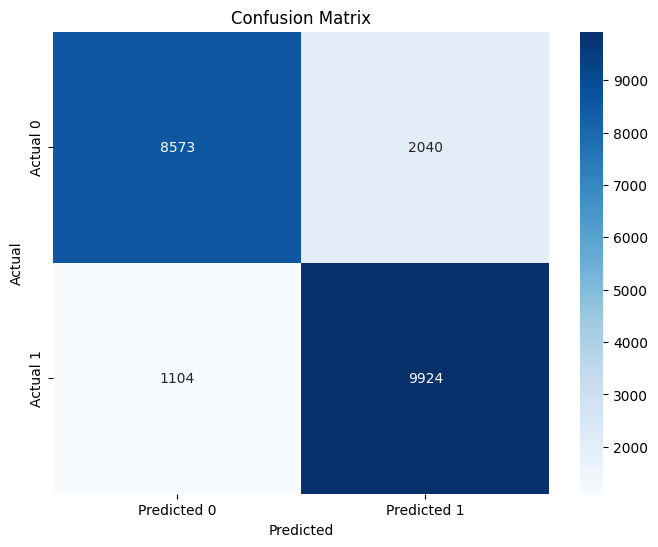

In [ ]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(ytest, bnb_model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85     10613
           1       0.83      0.90      0.86     11028

    accuracy                           0.85     21641
   macro avg       0.86      0.85      0.85     21641
weighted avg       0.86      0.85      0.85     21641



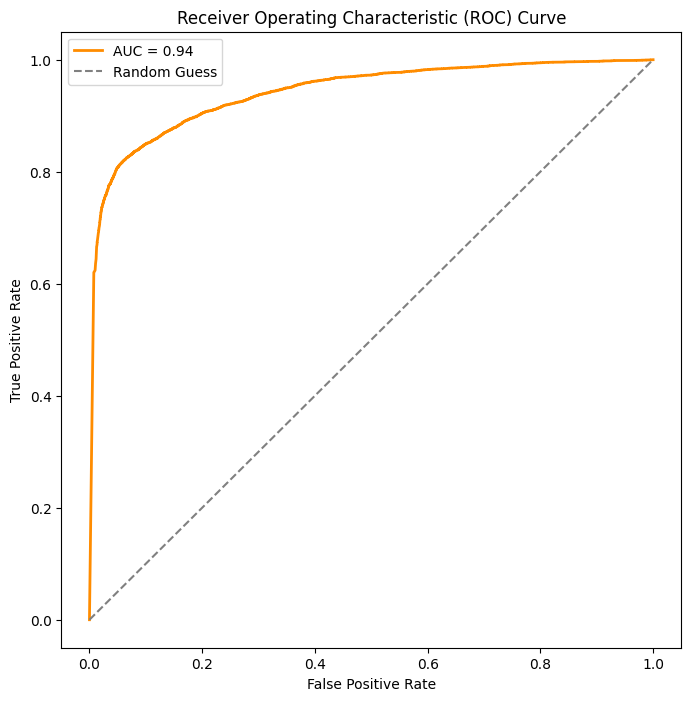

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'bnb_model' is your trained Bernoulli Naive Bayes model
# 'xtest' is the feature data, and 'ytest' is the corresponding labels

# Get predicted probabilities for the positive class
y_probs = bnb_model.predict_proba(xtest)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(ytest, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(xtrain, ytrain)

LogisticRegression(max_iter=1000)

In [ ]:
lr_results = evaluate_model(lr_model, xtest, ytest)

In [ ]:
lr_results

{'Accuracy': 0.9512499422392681,
 'Confusion Matrix': array([[ 9975,   638],
        [  417, 10611]])}

In [ ]:
cm_lr = confusion_matrix(ytest, lr_model.predict(xtest))
cm_lr

array([[ 9975,   638],
       [  417, 10611]])

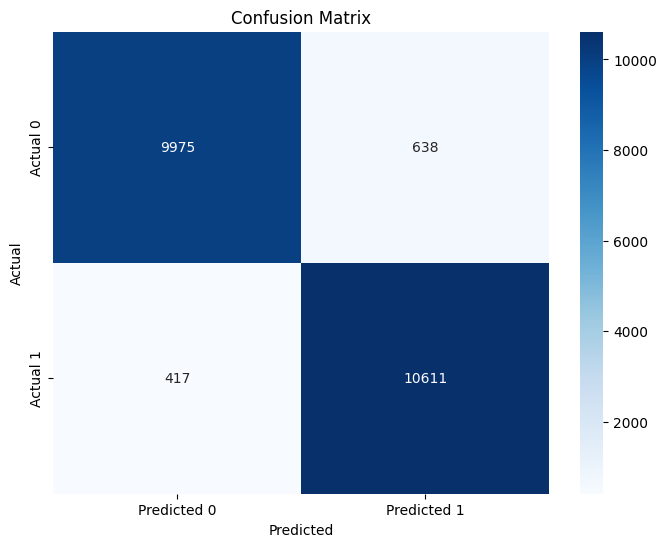

In [ ]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

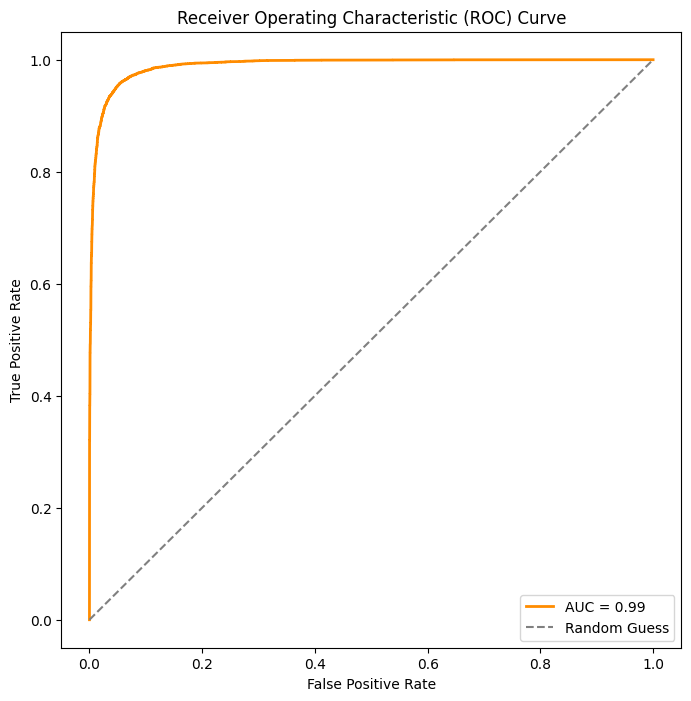

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'lr_model' is your trained logistic regression model
# 'xtest' is the feature data, and 'ytest' is the corresponding labels

# Get predicted probabilities for the positive class
y_probs = lr_model.predict_proba(xtest)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(ytest, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


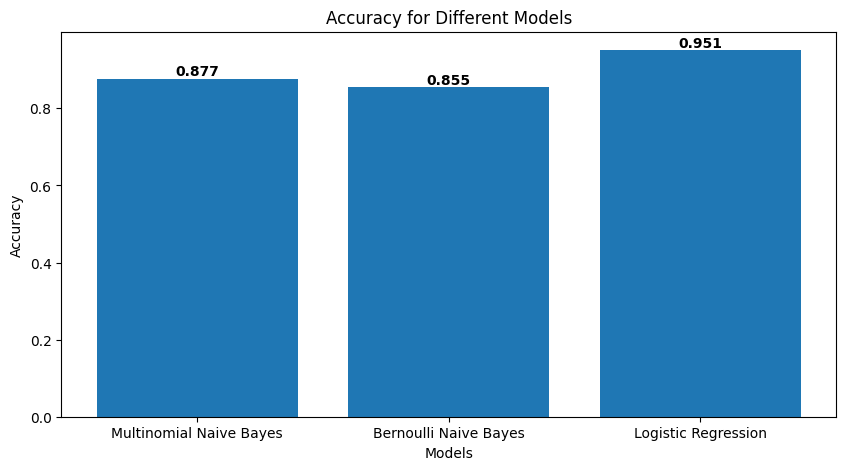

In [ ]:
def plot_histogram(metric_values, model_names, metric_name):
    fig, ax = plt.subplots(figsize=(10, 5))
    bars = plt.bar(model_names, metric_values)
    plt.xlabel('Models')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} for Different Models')

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', color='black', fontweight='bold')

    plt.show()

accuracy_values = [nb_results['Accuracy'], bnb_results['Accuracy'], lr_results['Accuracy']]
model_names = ['Multinomial Naive Bayes', 'Bernoulli Naive Bayes', 'Logistic Regression']
plot_histogram(accuracy_values, model_names, 'Accuracy')

In [ ]:
models = [mnb_model, bnb_model, lr_model]

In [ ]:
random_text = " No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 minute clip from the radio show can be heard here. It was provided to Breitbart Texas by someone who would like to be referred to as  Hannibal.  He has already received death threats as a result of interrupting #FYF911 conference calls.An unidentified black man said  when those mother f**kers are by themselves, that s when when we should start f***ing them up. Like they do us, when a bunch of them ni**ers takin  one of us out, that s how we should roll up.  He said,  Cause we already roll up in gangs anyway. There should be six or seven black mother f**ckers, see that white person, and then lynch their ass. Let s turn the tables. They conspired that if  cops started losing people,  then  there will be a state of emergency. He speculated that one of two things would happen,  a big-ass [R s?????] war,  or  ni**ers, they are going to start backin  up. We are already getting killed out here so what the f**k we got to lose? Sunshine could be heard saying,  Yep, that s true. That s so f**king true. He said,  We need to turn the tables on them. Our kids are getting shot out here. Somebody needs to become a sacrifice on their side.He said,  Everybody ain t down for that s**t, or whatever, but like I say, everybody has a different position of war.  He continued,  Because they don t give a f**k anyway.  He said again,  We might as well utilized them for that s**t and turn the tables on these n**ers. He said, that way  we can start lookin  like we ain t havin  that many casualties, and there can be more causalities on their side instead of ours. They are out their killing black people, black lives don t matter, that s what those mother f**kers   so we got to make it matter to them. Find a mother f**ker that is alone. Snap his ass, and then f***in hang him from a damn tree. Take a picture of it and then send it to the mother f**kers. We  just need one example,  and  then people will start watchin .  This will turn the tables on s**t, he said. He said this will start  a trickle-down effect.  He said that when one white person is hung and then they are just  flat-hanging,  that will start the  trickle-down effect.  He continued,  Black people are good at starting trends. He said that was how  to get the upper-hand. Another black man spoke up saying they needed to kill  cops that are killing us. The first black male said,  That will be the best method right there. Breitbart Texas previously reported how Sunshine was upset when  racist white people  infiltrated and disrupted one of her conference calls. She subsequently released the phone number of one of the infiltrators. The veteran immediately started receiving threatening calls.One of the #F***YoFlag movement supporters allegedly told a veteran who infiltrated their publicly posted conference call,  We are going to rape and gut your pregnant wife, and your f***ing piece of sh*t unborn creature will be hung from a tree. Breitbart Texas previously encountered Sunshine at a Sandra Bland protest at the Waller County Jail in Texas, where she said all white people should be killed. She told journalists and photographers,  You see this nappy-ass hair on my head?   That means I am one of those more militant Negroes.  She said she was at the protest because  these redneck mother-f**kers murdered Sandra Bland because she had nappy hair like me. #FYF911 black radicals say they will be holding the  imperial powers  that are actually responsible for the terrorist attacks on September 11th accountable on that day, as reported by Breitbart Texas. There are several websites and Twitter handles for the movement. Palmetto Star  describes himself as one of the head organizers. He said in a YouTube video that supporters will be burning their symbols of  the illusion of their superiority,  their  false white supremacy,  like the American flag, the British flag, police uniforms, and Ku Klux Klan hoods.Sierra McGrone or  Nocturnus Libertus  posted,  you too can help a young Afrikan clean their a** with the rag of oppression.  She posted two photos, one that appears to be herself, and a photo of a black man, wiping their naked butts with the American flag.For entire story: Breitbart News"

preprocessed_text = preprocess_text(random_text) # remove punctuation
lemmatized_text = lemmatize_text(preprocessed_text) # text scaling
text_vector = vectorizer.transform([lemmatized_text])

In [ ]:
preprocessed_text

['comment',
 'expected',
 'Barack',
 'Obama',
 'Members',
 'FYF911',
 'FukYoFlag',
 'BlackLivesMatter',
 'movements',
 'called',
 'lynching',
 'hanging',
 'white',
 'people',
 'cops',
 'encouraged',
 'others',
 'radio',
 'show',
 'Tuesday',
 'night',
 'turn',
 'tide',
 'kill',
 'white',
 'people',
 'cops',
 'send',
 'message',
 'killing',
 'black',
 'people',
 'AmericaOne',
 'FYoFlag',
 'organizers',
 'called',
 'Sunshine',
 'radio',
 'blog',
 'show',
 'hosted',
 'Texas',
 'called',
 'Sunshine',
 'Fing',
 'Opinion',
 'Radio',
 'Show',
 'snapshot',
 'FYF911',
 'LOLatWhiteFear',
 'Twitter',
 'page',
 '953',
 'pm',
 'shows',
 'urging',
 'supporters',
 'Call',
 'fyf911',
 'tonight',
 'continue',
 'dismantle',
 'illusion',
 'white',
 'SNAPSHOT',
 'Twitter',
 'Radio',
 'Call',
 'Invite',
 'FYF911The',
 'radio',
 'show',
 'aired',
 '1000',
 'pm',
 'eastern',
 'standard',
 'timeDuring',
 'show',
 'callers',
 'clearly',
 'call',
 'lynching',
 'killing',
 'white',
 'peopleA',
 '239',
 'minute',


In [ ]:
text_vector

<1x363106 sparse matrix of type '<class 'numpy.float64'>'
	with 283 stored elements in Compressed Sparse Row format>

In [ ]:
text_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
for model in models:
    prediction = model.predict(text_vector)
    print(f"Model: {type(model).__name__}")
    print("Prediction:", prediction)
    print('\n')

Model: MultinomialNB
Prediction: [1]


Model: BernoulliNB
Prediction: [1]


Model: LogisticRegression
Prediction: [1]




In [ ]:
import pickle

# Define a file path where you want to save the model
model_file_path = 'logistic_regression_model.pkl'

# Save the model to the file
with open(model_file_path, 'wb') as model_file:
    pickle.dump(lr_model, model_file)

In [ ]:
with open(model_file_path, 'rb') as model_file:
    loaded_LR = pickle.load(model_file)

In [ ]:
loaded_LR.predict(xtest)

array([1, 1, 0, ..., 1, 1, 0])

In [ ]:
loaded_LR.score(xtest, ytest)

0.9512499422392681

In [ ]:
text_vector

<1x363106 sparse matrix of type '<class 'numpy.float64'>'
	with 283 stored elements in Compressed Sparse Row format>

In [ ]:
loaded_LR.predict(text_vector)

array([1])

In [ ]:
 print(classification_report(ytest, mnb_model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     10613
           1       0.91      0.84      0.87     11028

    accuracy                           0.88     21641
   macro avg       0.88      0.88      0.88     21641
weighted avg       0.88      0.88      0.88     21641



In [ ]:
 print(classification_report(ytest, lr_model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     10613
           1       0.94      0.96      0.95     11028

    accuracy                           0.95     21641
   macro avg       0.95      0.95      0.95     21641
weighted avg       0.95      0.95      0.95     21641



In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

knn_model = KNeighborsClassifier(n_neighbors=69)

knn_model.fit(xtrain, ytrain)


KNeighborsClassifier(n_neighbors=69)

{'Accuracy': 0.7858331023010813, 'Confusion Matrix': array([[2283, 1251],
       [ 294, 3386]])}
[[2283 1251]
 [ 294 3386]]
Accuracy: 0.7858331023010813
              precision    recall  f1-score   support

           0       0.89      0.65      0.75      3534
           1       0.73      0.92      0.81      3680

    accuracy                           0.79      7214
   macro avg       0.81      0.78      0.78      7214
weighted avg       0.81      0.79      0.78      7214



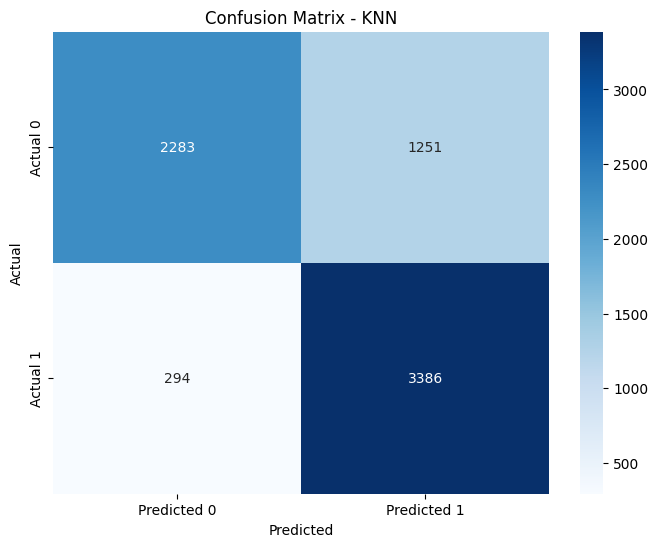

In [88]:
y_pred = knn_model.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)
knnacc=accuracy
cm = confusion_matrix(ytest, y_pred)
print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(ytest, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()


In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

svm_model = SVC()
svm_model.fit(xtrain, ytrain)



SVC()

Accuracy: 0.9708899362350984
Confusion Matrix:
[[3398  136]
 [  74 3606]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3534
           1       0.96      0.98      0.97      3680

    accuracy                           0.97      7214
   macro avg       0.97      0.97      0.97      7214
weighted avg       0.97      0.97      0.97      7214



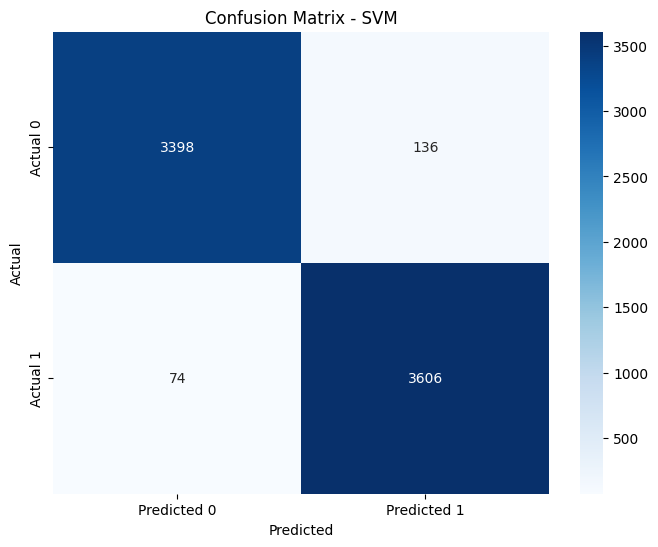

In [90]:
y_pred = svm_model.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)
svmacc=accuracy
cm = confusion_matrix(ytest, y_pred)
print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(ytest, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()



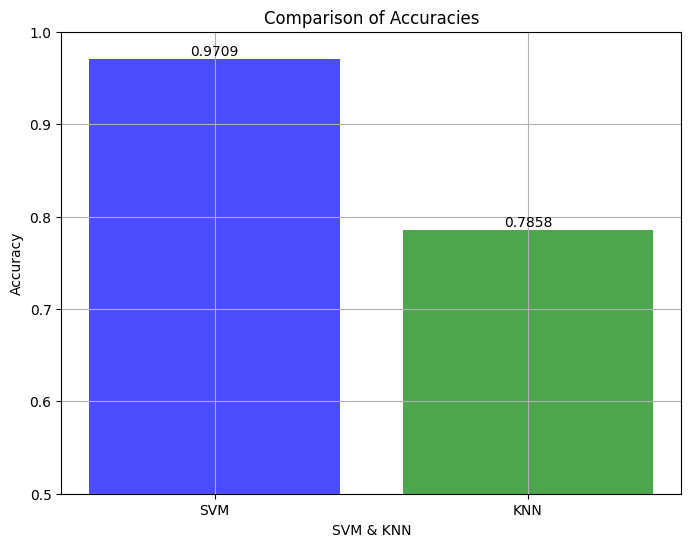

In [91]:
import matplotlib.pyplot as plt

accuracies = [svmacc, knnacc]

labels = ['SVM', 'KNN']
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, accuracies, color=['blue', 'green'], alpha=0.7)
plt.xlabel('SVM & KNN')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracies')
plt.ylim(0.5, 1.0)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(acc, 4),
             ha='center', va='bottom', fontsize=10, color='black')

plt.show()

